In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = df.drop(labels=df.columns[0],axis=1)

In [4]:
print(df.dtypes)

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


For price, min is very far from mean so there must be outliers

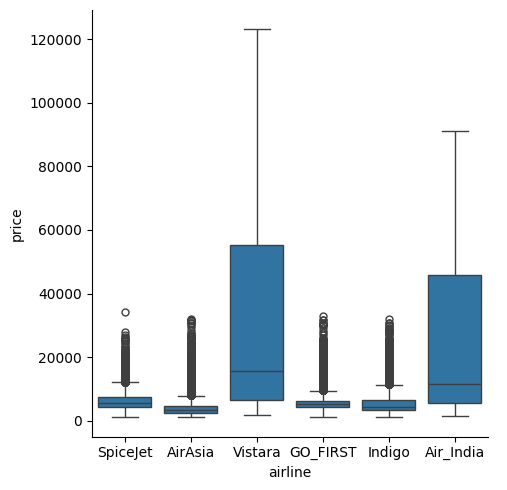

In [7]:
g = sns.catplot(x='airline',y='price',data=df,kind="box")
plt.show()

In [8]:
df.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [9]:
df.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
print(df[df['source_city']==df['destination_city']])        # Check for anamoly

Empty DataFrame
Columns: [airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


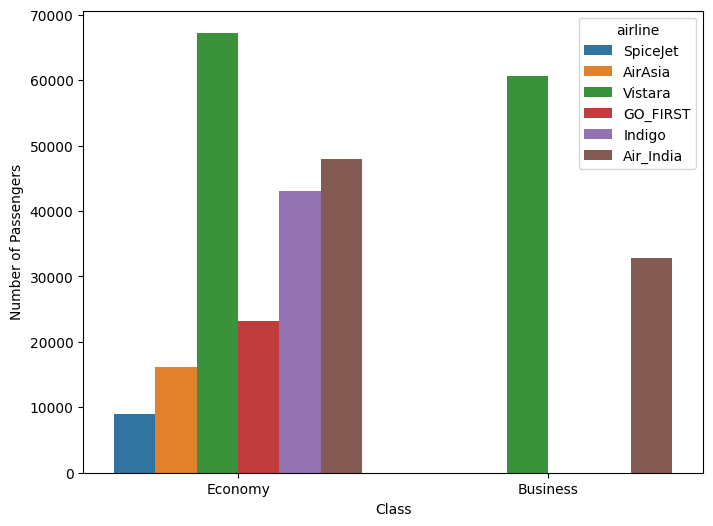

In [11]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='class',data=df,hue='airline')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

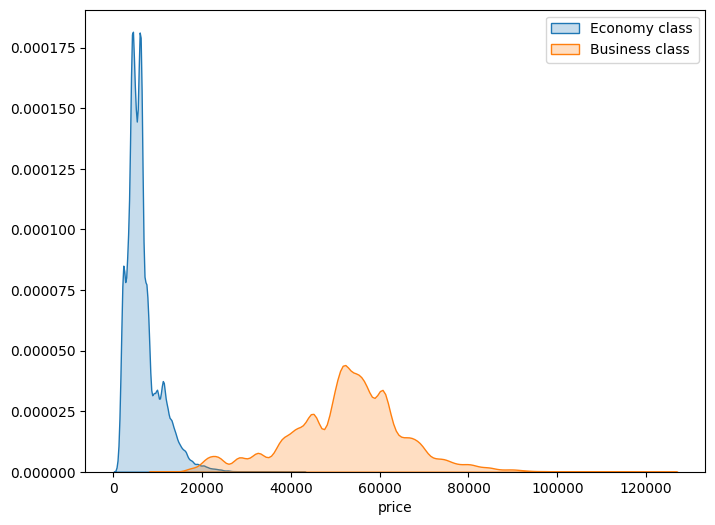

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.loc[df['class']=='Economy','price'],label='Economy class',shade=True)
sns.kdeplot(df.loc[df['class']=='Business','price'],label='Business class',shade=True)
plt.ylabel('')
plt.legend()
plt.show()

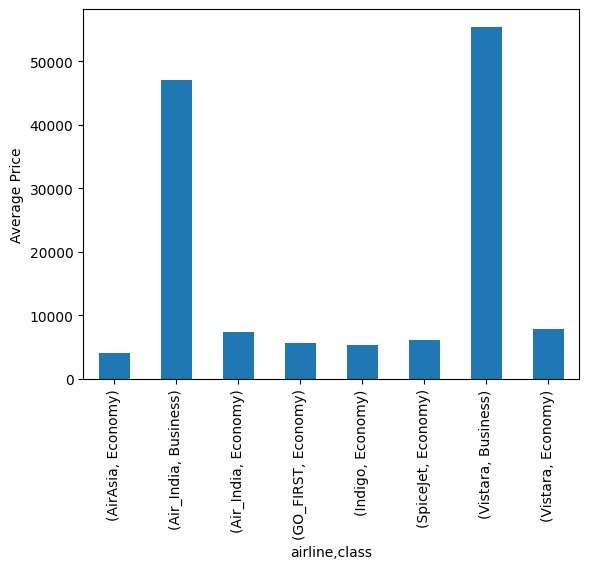

In [13]:
airline_df = df.groupby(['airline','class'])['price'].mean()
airline_df.plot(kind='bar')
plt.ylabel('Average Price')
plt.show()

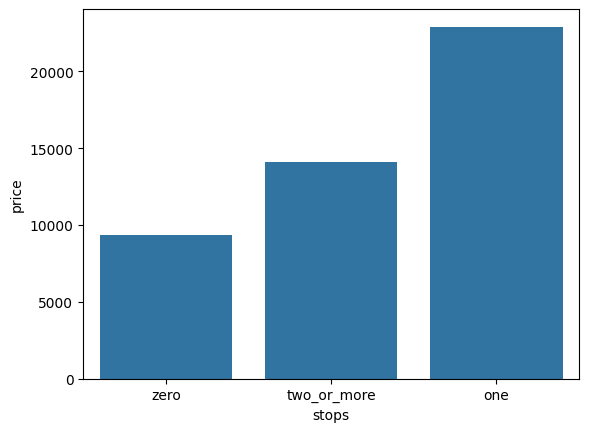

In [14]:
stops_df = df.groupby('stops')['price'].mean().sort_values().reset_index()
sns.barplot(data=stops_df,x='stops',y='price')
plt.show()

In [15]:
plt.figure(figsize=(8,8))
location_df = df.groupby(['airline','source_city','destination_city'])['price'].mean().sort_values().reset_index()
print(location_df)

      airline source_city destination_city         price
0    GO_FIRST     Chennai        Hyderabad   1613.105263
1     AirAsia     Chennai        Bangalore   1914.760870
2    GO_FIRST   Hyderabad          Chennai   1942.263158
3     AirAsia     Chennai        Hyderabad   2053.182540
4     AirAsia   Bangalore          Chennai   2073.043478
..        ...         ...              ...           ...
172   Vistara   Bangalore           Mumbai  34961.383271
173   Vistara      Mumbai        Bangalore  35029.880315
174   Vistara      Mumbai          Kolkata  35223.862417
175   Vistara       Delhi          Kolkata  35702.441732
176   Vistara   Bangalore          Kolkata  35746.714874

[177 rows x 4 columns]


<Figure size 800x800 with 0 Axes>

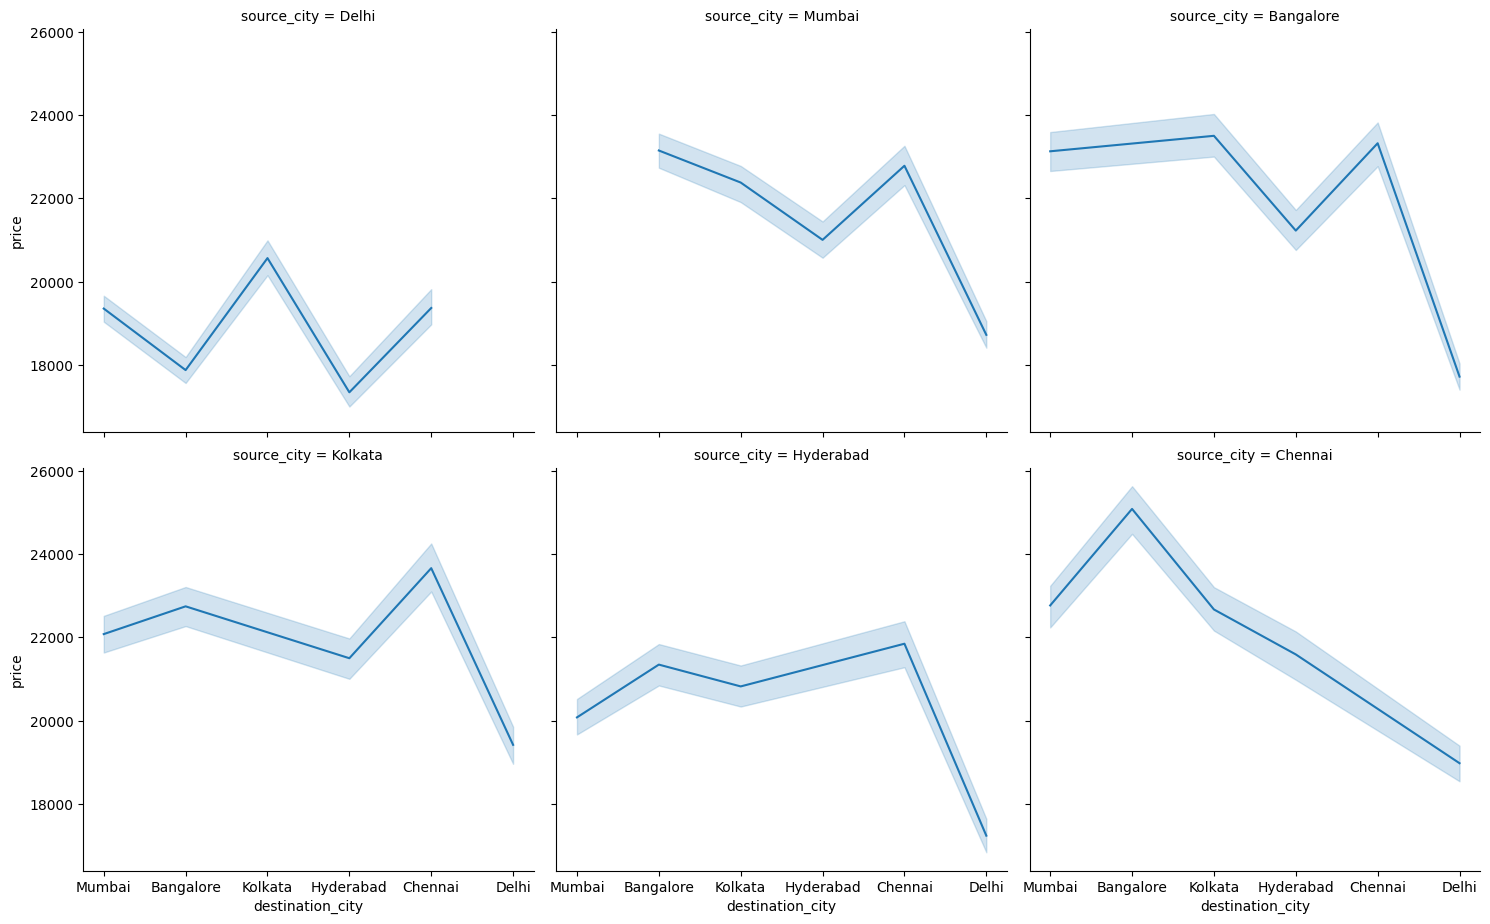

In [16]:
ax=sns.relplot(col='source_city',y='price',kind='line',x='destination_city',data=df,col_wrap=3)
ax.fig.subplots_adjust(top=0.9)

In [17]:
source_df = df.groupby('source_city')['price'].mean().sort_values(ascending=False).reset_index()
source_df

,source_city,price
0,Chennai,21995.339871
1,Kolkata,21746.235679
2,Mumbai,21483.818839
3,Bangalore,21469.460575
4,Hyderabad,20155.623879
5,Delhi,18951.326639


In [18]:
destination_df = df.groupby('destination_city')['price'].mean().sort_values(ascending=False).reset_index()
destination_df

,destination_city,price
0,Kolkata,21959.557556
1,Chennai,21953.323969
2,Bangalore,21593.955784
3,Mumbai,21372.529469
4,Hyderabad,20427.661284
5,Delhi,18436.767870


In [19]:
duration_df = df.groupby(['source_city','destination_city'])['duration'].mean().sort_values(ascending=False).reset_index()
duration_df

,source_city,destination_city,duration
0,Kolkata,Chennai,14.774182
1,Chennai,Kolkata,14.515774
2,Bangalore,Chennai,14.480207
3,Bangalore,Hyderabad,14.162433
4,Chennai,Bangalore,13.952594
5,Kolkata,Hyderabad,13.853108
6,Kolkata,Bangalore,13.792947
7,Hyderabad,Kolkata,13.535322
8,Hyderabad,Chennai,13.293238
9,Mumbai,Hyderabad,13.263310


Text(0.5, 1.0, 'Days left VS Price')

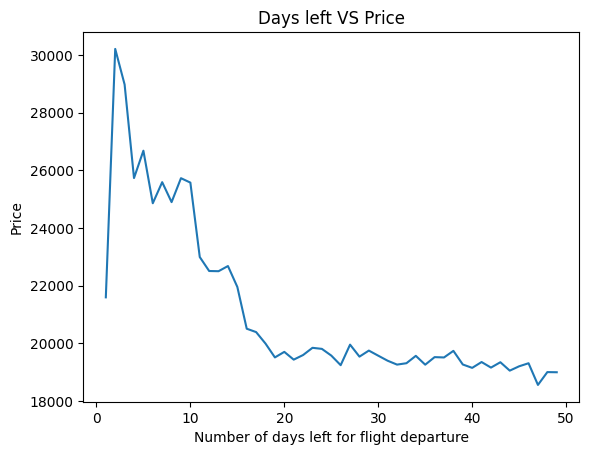

In [20]:
days_left_df = df.groupby('days_left')['price'].mean().reset_index()
plt.plot(days_left_df['days_left'],days_left_df['price'])
plt.xlabel('Number of days left for flight departure')
plt.ylabel('Price')
plt.title('Days left VS Price')

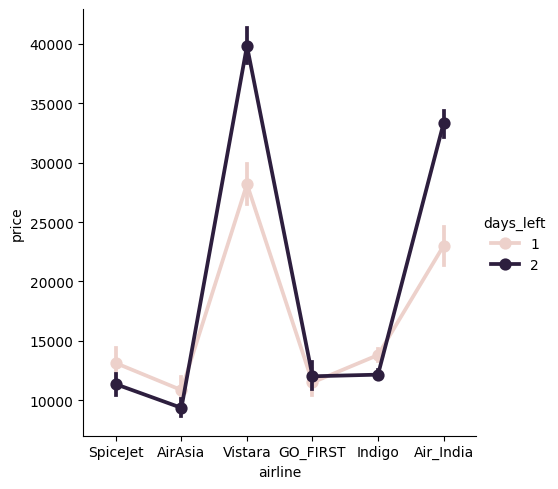

In [21]:
filtered_days_left = df[df['days_left'].isin([1,2])]
sns.catplot(x='airline',y='price',data=filtered_days_left,kind='point',hue='days_left')

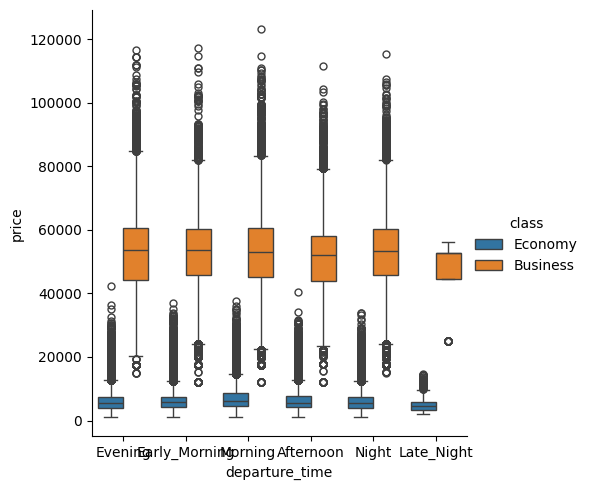

In [22]:
sns.catplot(x='departure_time',y='price',data=df,kind='box',hue='class')

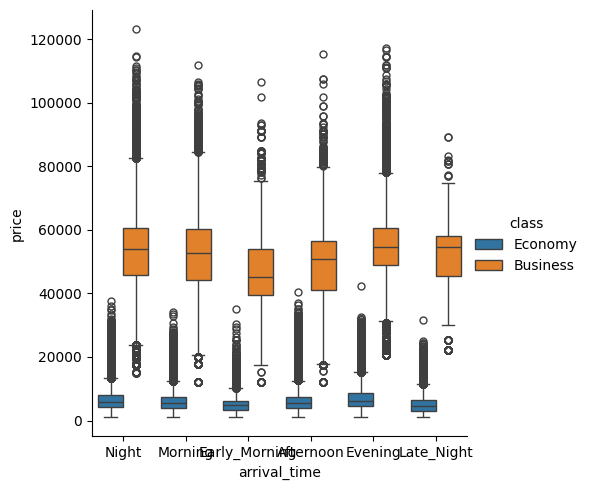

In [23]:
sns.catplot(x='arrival_time',y='price',data=df,kind='box',hue='class')

In [24]:
def encode_categorical(column):
    unique_values = column.unique()
    encoding_dict = {value: i for i, value in enumerate(unique_values)}
    column.replace(encoding_dict, inplace=True)

df_corr = df.copy()
categorical_data = df_corr.select_dtypes(include='object')

for col in categorical_data.columns:
    encode_categorical(df_corr[col])
    
df_corr.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,0,0,0,0,2.17,1,5953
1,0,1,0,1,0,1,0,0,2.33,1,5953
2,1,2,0,1,0,2,0,0,2.17,1,5956
3,2,3,0,2,0,3,0,0,2.25,1,5955
4,2,4,0,2,0,1,0,0,2.33,1,5955


<Figure size 1200x800 with 0 Axes>

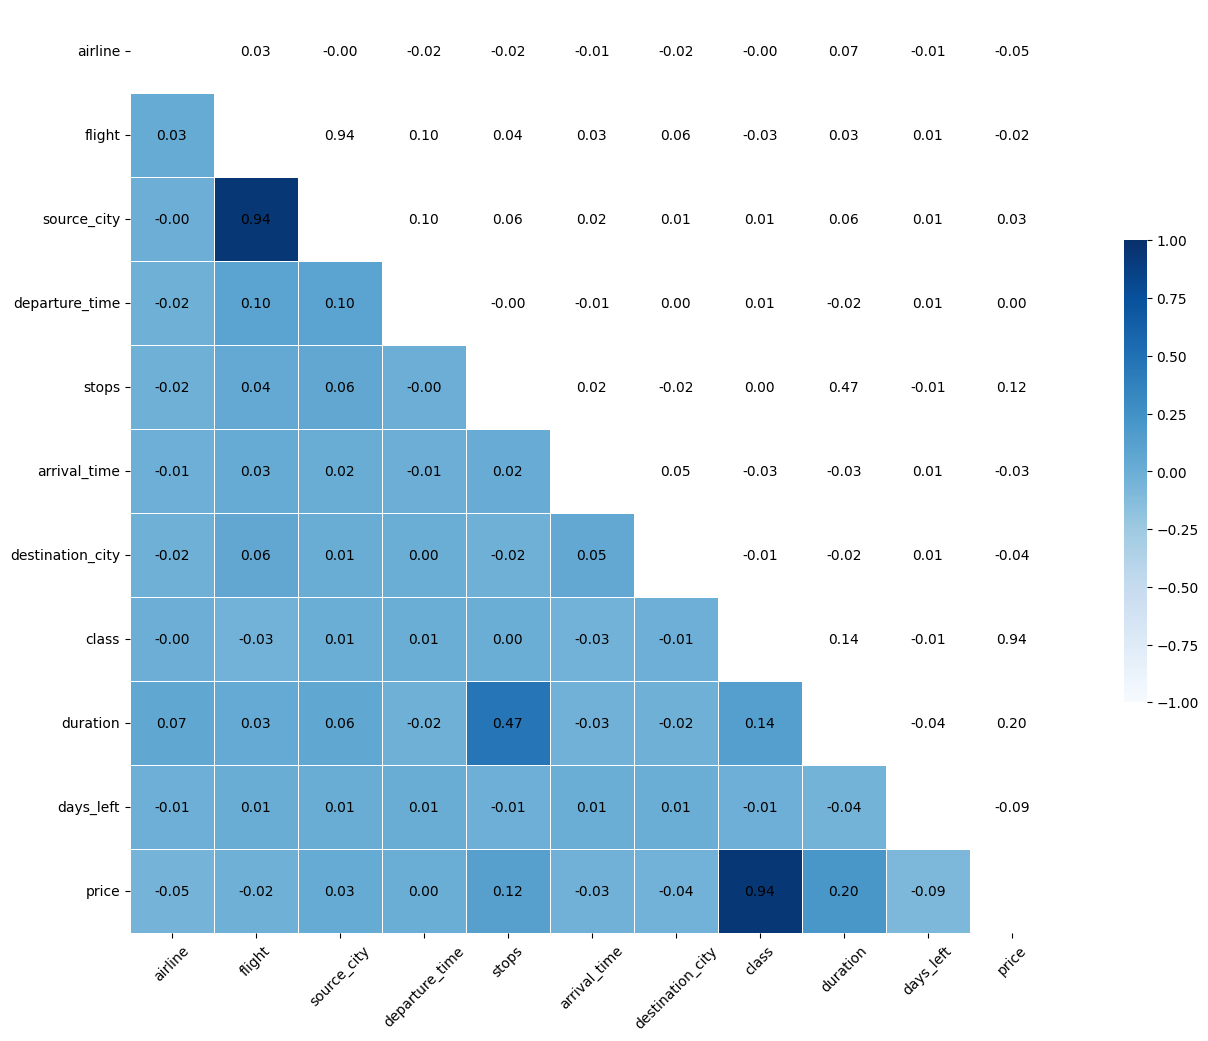

In [25]:
plt.figure(figsize=(12, 8))  
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5})
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j:
            ax.text(j+0.5, i+0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()